In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

IMG_PATHS = [
    "../resource/img/homework 3/sIMG_8253.JPG",
    "../resource/img/homework 3/sIMG_8254.JPG",
    "../resource/img/homework 3/sIMG_8255.JPG",
    "../resource/img/homework 3/sIMG_8256.JPG"
]

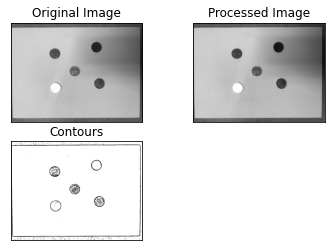

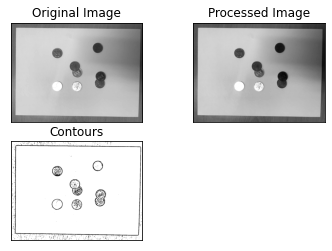

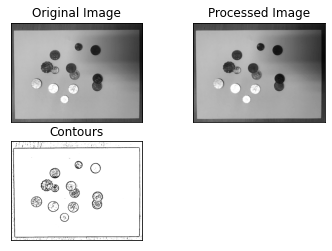

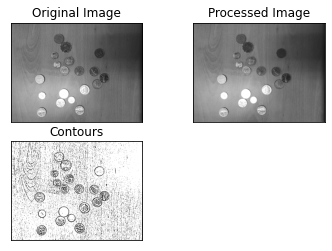

In [5]:
for img_path in IMG_PATHS:
    img = cv2.imread(img_path, 0)
    blur = cv2.medianBlur(img, 5)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cont_img = thresh.copy()
    contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area < 2000 or area > 4000:
            continue

        if len(cnt) < 5:
            continue

        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img, ellipse, (0,255,0), 2)
    
    titles = [
        "Original Image",
        "Processed Image",
        "Contours"
    ]
    imgs = [img, blur, thresh]
    
    for i, title in enumerate(titles):
        plt.subplot(2, 2, i + 1)
        plt.imshow(imgs[i], "gray")
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
        
    plt.show()